In [5]:
import cv2
import matplotlib.pyplot as plt

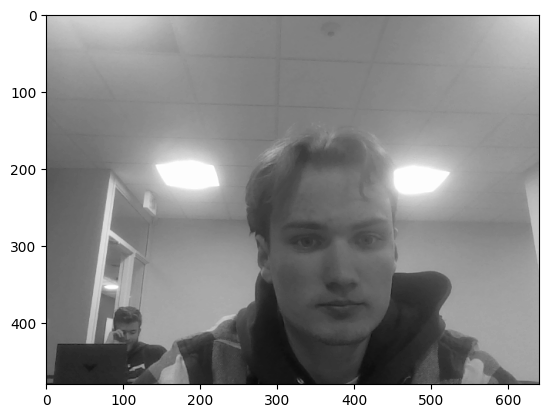

In [7]:
vid = cv2.VideoCapture(0)
  
ret, frame = vid.read()

# convert color image into grayscale image
img1 = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
  
# plot that grayscale image with Matplotlib
# cmap stands for colormap
plt.imshow(img1, cmap='gray')
  
# display that image
plt.show()